In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor

import joblib


In [5]:
df = pd.read_csv("/content/spg.csv")
df.head()


,temperature_2_m_above_gnd,relative_humidity_2_m_above_gnd,mean_sea_level_pressure_MSL,total_precipitation_sfc,snowfall_amount_sfc,total_cloud_cover_sfc,high_cloud_cover_high_cld_lay,medium_cloud_cover_mid_cld_lay,low_cloud_cover_low_cld_lay,shortwave_radiation_backwards_sfc,...,wind_direction_10_m_above_gnd,wind_speed_80_m_above_gnd,wind_direction_80_m_above_gnd,wind_speed_900_mb,wind_direction_900_mb,wind_gust_10_m_above_gnd,angle_of_incidence,zenith,azimuth,generated_power_kw
0,2.17,31,1035.0,0.0,0.0,0.0,0,0,0,0.00,...,312.71,9.36,22.62,6.62,337.62,24.48,58.753108,83.237322,128.33543,454.10095
1,2.31,27,1035.1,0.0,0.0,0.0,0,0,0,1.78,...,294.78,5.99,32.74,4.61,321.34,21.96,45.408585,75.143041,139.65530,1411.99940
2,3.65,33,1035.4,0.0,0.0,0.0,0,0,0,108.58,...,270.00,3.89,56.31,3.76,286.70,14.04,32.848282,68.820648,152.53769,2214.84930
3,5.82,30,1035.4,0.0,0.0,0.0,0,0,0,258.10,...,323.13,3.55,23.96,3.08,339.44,19.80,22.699288,64.883536,166.90159,2527.60920
4,7.73,27,1034.4,0.0,0.0,0.0,0,0,0,375.58,...,10.01,6.76,25.20,6.62,22.38,16.56,19.199908,63.795208,182.13526,2640.20340


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4213 entries, 0 to 4212
Data columns (total 21 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   temperature_2_m_above_gnd          4213 non-null   float64
 1   relative_humidity_2_m_above_gnd    4213 non-null   int64  
 2   mean_sea_level_pressure_MSL        4213 non-null   float64
 3   total_precipitation_sfc            4213 non-null   float64
 4   snowfall_amount_sfc                4213 non-null   float64
 5   total_cloud_cover_sfc              4213 non-null   float64
 6   high_cloud_cover_high_cld_lay      4213 non-null   int64  
 7   medium_cloud_cover_mid_cld_lay     4213 non-null   int64  
 8   low_cloud_cover_low_cld_lay        4213 non-null   int64  
 9   shortwave_radiation_backwards_sfc  4213 non-null   float64
 10  wind_speed_10_m_above_gnd          4213 non-null   float64
 11  wind_direction_10_m_above_gnd      4213 non-null   float

In [7]:
df.columns

Index(['temperature_2_m_above_gnd', 'relative_humidity_2_m_above_gnd',
       'mean_sea_level_pressure_MSL', 'total_precipitation_sfc',
       'snowfall_amount_sfc', 'total_cloud_cover_sfc',
       'high_cloud_cover_high_cld_lay', 'medium_cloud_cover_mid_cld_lay',
       'low_cloud_cover_low_cld_lay', 'shortwave_radiation_backwards_sfc',
       'wind_speed_10_m_above_gnd', 'wind_direction_10_m_above_gnd',
       'wind_speed_80_m_above_gnd', 'wind_direction_80_m_above_gnd',
       'wind_speed_900_mb', 'wind_direction_900_mb',
       'wind_gust_10_m_above_gnd', 'angle_of_incidence', 'zenith', 'azimuth',
       'generated_power_kw'],
      dtype='object')

In [8]:
df.isnull().sum()


,0
temperature_2_m_above_gnd,0
relative_humidity_2_m_above_gnd,0
mean_sea_level_pressure_MSL,0
total_precipitation_sfc,0
snowfall_amount_sfc,0
total_cloud_cover_sfc,0
high_cloud_cover_high_cld_lay,0
medium_cloud_cover_mid_cld_lay,0
low_cloud_cover_low_cld_lay,0
shortwave_radiation_backwards_sfc,0


In [9]:
df.fillna(df.mean(), inplace=True)


In [10]:
X = df.drop("generated_power_kw", axis=1)
y = df["generated_power_kw"]


In [11]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [12]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


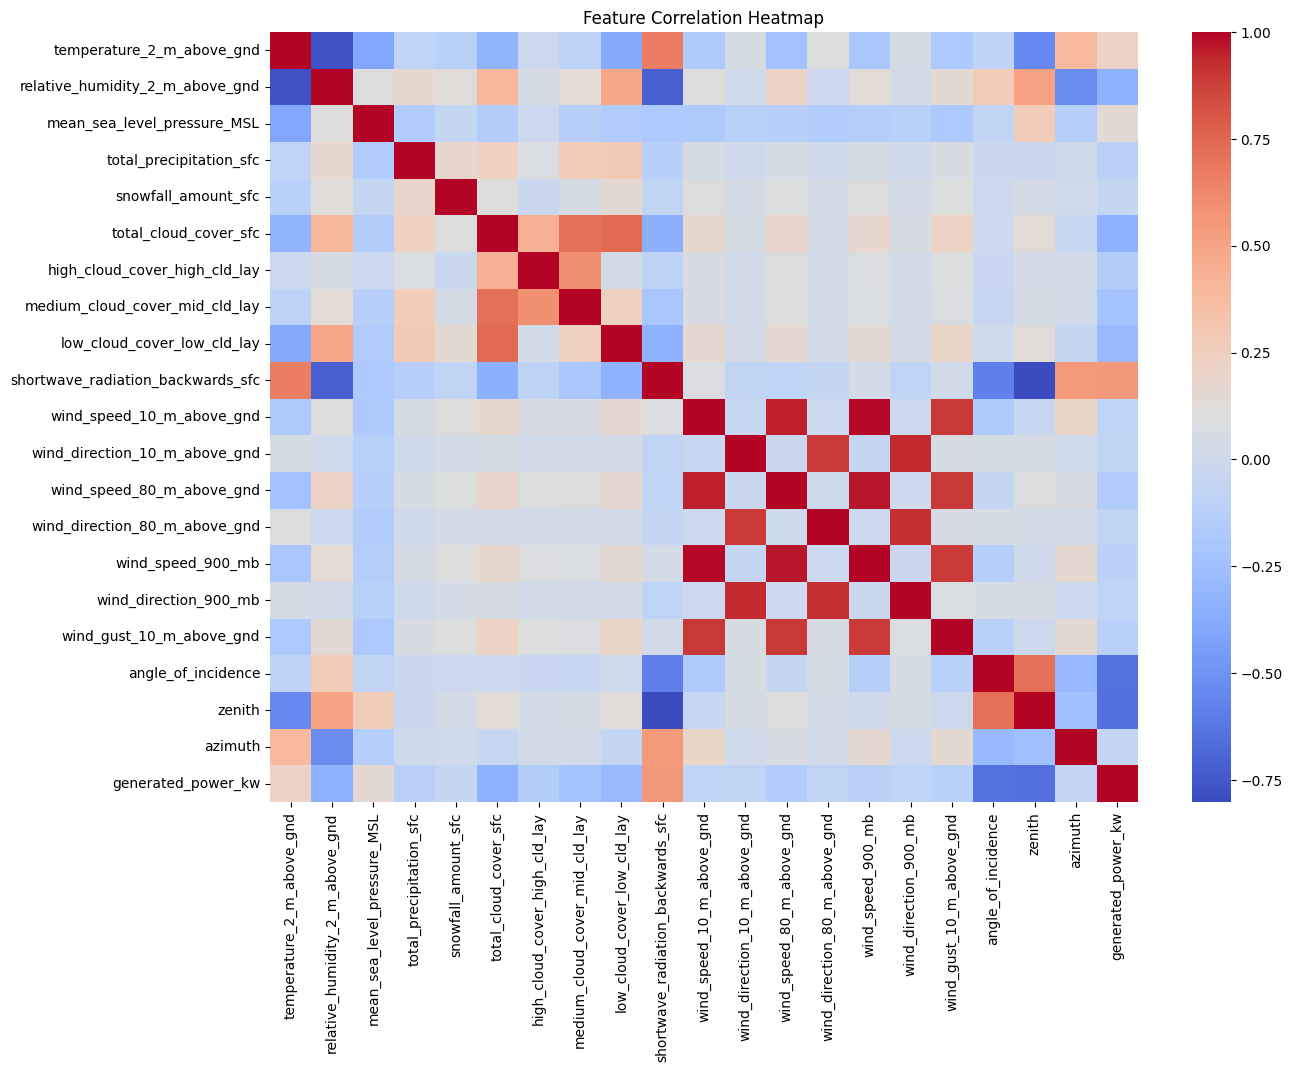

In [13]:
plt.figure(figsize=(14,10))
sns.heatmap(df.corr(), cmap="coolwarm", annot=False)
plt.title("Feature Correlation Heatmap")
plt.show()


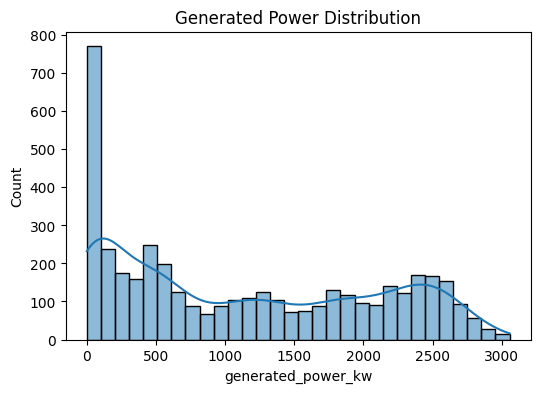

In [16]:
plt.figure(figsize=(6,4))
sns.histplot(df["generated_power_kw"], bins=30, kde=True)
plt.title("Generated Power Distribution")
plt.show()


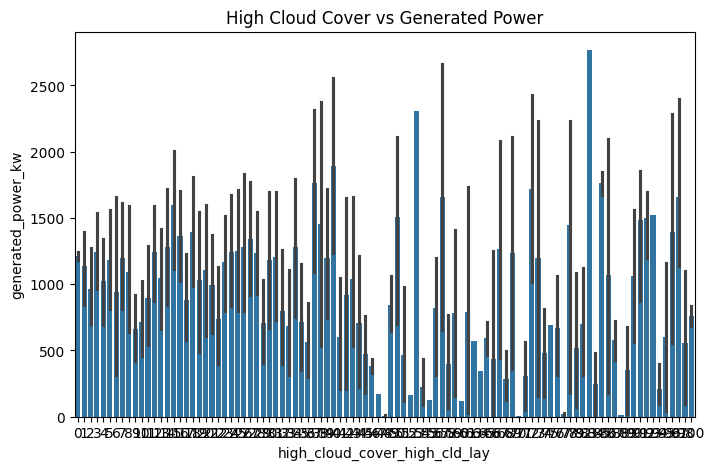

In [18]:
plt.figure(figsize=(8,5))
sns.barplot(x=df["high_cloud_cover_high_cld_lay"], y=df["generated_power_kw"])
plt.title("High Cloud Cover vs Generated Power")
plt.show()


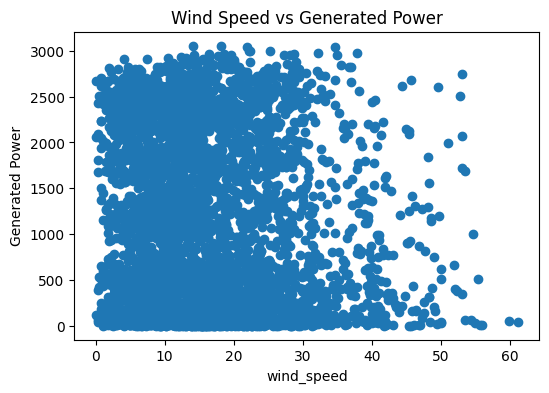

In [21]:
plt.figure(figsize=(6,4))
plt.scatter(df["wind_speed_10_m_above_gnd"], df["generated_power_kw"])
plt.xlabel("wind_speed")
plt.ylabel("Generated Power")
plt.title("Wind Speed vs Generated Power")
plt.show()


In [22]:
model = RandomForestRegressor(
    n_estimators=200,
    random_state=42
)

model.fit(X_train_scaled, y_train)


RandomForestRegressor(n_estimators=200, random_state=42)

In [23]:
y_pred = model.predict(X_test_scaled)


In [24]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r2)


MAE: 253.70058547597193
MSE: 163002.585874491
RMSE: 403.735787210511
R2 Score: 0.8215554992073544


In [25]:
importance = model.feature_importances_
features = X.columns

imp_df = pd.DataFrame({
    "Feature": features,
    "Importance": importance
}).sort_values(by="Importance", ascending=False)

imp_df


,Feature,Importance
17,angle_of_incidence,0.345835
18,zenith,0.156911
5,total_cloud_cover_sfc,0.134033
19,azimuth,0.107273
9,shortwave_radiation_backwards_sfc,0.072138
2,mean_sea_level_pressure_MSL,0.028421
1,relative_humidity_2_m_above_gnd,0.026719
16,wind_gust_10_m_above_gnd,0.022465
0,temperature_2_m_above_gnd,0.021203
8,low_cloud_cover_low_cld_lay,0.011076


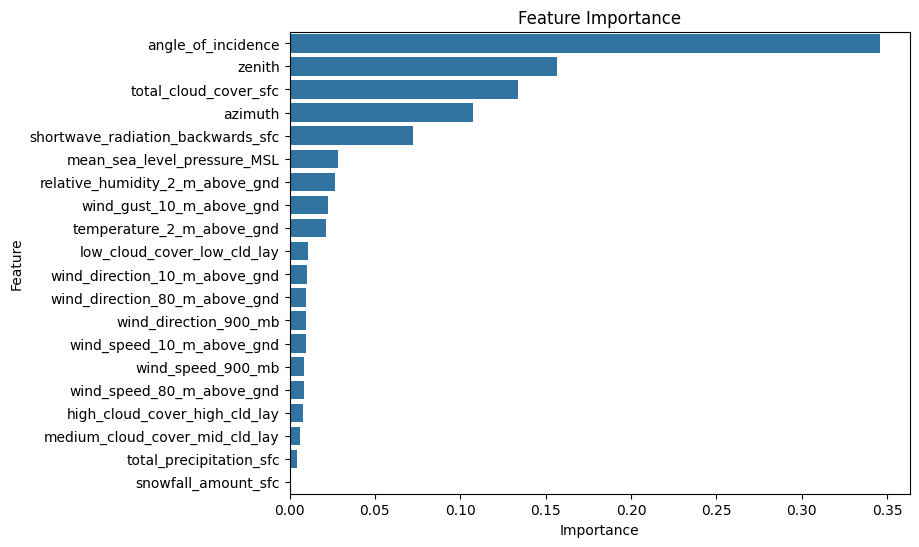

In [26]:
plt.figure(figsize=(8,6))
sns.barplot(x=imp_df["Importance"], y=imp_df["Feature"])
plt.title("Feature Importance")
plt.show()


In [28]:
import os

os.makedirs("models", exist_ok=True)
os.makedirs("data", exist_ok=True)


In [29]:
import joblib

joblib.dump(model, "models/solar_model.pkl")
joblib.dump(scaler, "models/scaler.pkl")

print("Model and scaler saved successfully!")


Model and scaler saved successfully!


In [30]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [32]:
import os

base_path = "/content/drive/MyDrive/solar_project"
os.makedirs(base_path, exist_ok=True)

print("Folder created or already exists")


Folder created or already exists


In [33]:
import joblib

joblib.dump(model, f"{base_path}/solar_model.pkl")
joblib.dump(scaler, f"{base_path}/scaler.pkl")

print("Model and scaler saved successfully in Google Drive!")


Model and scaler saved successfully in Google Drive!


In [34]:
os.listdir(base_path)


['solar_model.pkl', 'scaler.pkl']

In [35]:
loaded_model = joblib.load("models/solar_model.pkl")
loaded_scaler = joblib.load("models/scaler.pkl")

print("Model loaded successfully!")


Model loaded successfully!


In [36]:
import joblib
import numpy as np
import os

base_path = "/content/drive/MyDrive/solar_project"

model = joblib.load(os.path.join(base_path, "solar_model.pkl"))
scaler = joblib.load(os.path.join(base_path, "scaler.pkl"))

print("Model & scaler loaded successfully!")


Model & scaler loaded successfully!


In [37]:
FEATURE_NAMES = [
    "azimuth",
    "zenith",
    "angle_of_incidence",
    "wind_gust",
    "wind_direction",
    "wind_speed",
    "high_cloud_cover",
    "medium_cloud_cover",
    "low_cloud_cover",
    "snowfall_amount",
    "total_precipitation",
    "mean_sea_level",
    "relative_humidity"
]


In [38]:
def predict_solar_power(input_data):
    """
    input_data: dict with feature names as keys
    returns: predicted generated power
    """

    # Convert dict → array in correct order
    input_array = np.array([[input_data[feature] for feature in FEATURE_NAMES]])

    # Scale input
    input_scaled = scaler.transform(input_array)

    # Predict
    prediction = model.predict(input_scaled)

    return float(prediction[0])


In [40]:
sample_input = {
    "azimuth": 180,
    "zenith": 40,
    "angle_of_incidence": 25,

    "wind_speed": 3.5,
    "wind_gust": 6.2,
    "wind_direction": 270,

    "high_cloud_cover": 15,
    "medium_cloud_cover": 30,
    "low_cloud_cover": 10,

    "relative_humidity": 55,
    "mean_sea_level": 1012,
    "surface_pressure": 1008,
    "air_temperature": 32,
    "dew_point": 18,

    "total_precipitation": 0,
    "snowfall_amount": 0,
    "rainfall_amount": 0,

    "solar_irradiance": 820,
    "visibility": 10
}


In [41]:
predicted_power = predict_solar_power(sample_input)
print("Predicted Solar Power:", predicted_power)


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


ValueError: X has 13 features, but StandardScaler is expecting 20 features as input.

In [42]:
feature_names = X.columns.tolist()

joblib.dump(feature_names, f"{base_path}/features.pkl")


['/content/drive/MyDrive/solar_project/features.pkl']

In [43]:
import joblib
import pandas as pd

model = joblib.load(f"{base_path}/solar_model.pkl")
scaler = joblib.load(f"{base_path}/scaler.pkl")
feature_names = joblib.load(f"{base_path}/features.pkl")


In [47]:
sample_input = {
    "azimuth": 180,
    "zenith": 30,
    "angle_of_incidence": 25,
    "wind_gust_10_m_above_gnd": 5,
    "wind_direction_10_m_above_gnd": 120,
    "wind_speed_10_m_above_gnd": 3,
    "high_cloud_cover_high_cld_lay": 20,
    "medium_cloud_cover_mid_cld_lay": 10,
    "low_cloud_cover_low_cld_lay": 5,
    "snowfall_amount_sfc": 0,
    "total_precipitation_sfc": 0,
    "mean_sea_level_pressure_MSL": 1012,
    "relative_humidity_2_m_above_gnd": 60,
    "solar_irradiance": 820,
    "visibility": 10,
    "temperature_2_m_above_gnd":45,
    "total_cloud_cover_sfc":20,
    "shortwave_radiation_backwards_sfc":450,
    "wind_speed_80_m_above_gnd":45,
    "wind_direction_80_m_above_gnd":30,
    "wind_speed_900_mb":50,
    "wind_direction_900_mb":40
}

input_df = pd.DataFrame([sample_input])
input_df = input_df[feature_names]   # 🔥 ensures correct order


In [48]:
input_scaled = scaler.transform(input_df)
predicted_power = model.predict(input_scaled)

print("Predicted Solar Power:", predicted_power[0])


Predicted Solar Power: 1750.7033442999998


In [49]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [50]:
import os

BASE_PATH = "/content/drive/MyDrive/solar_project"

os.makedirs(BASE_PATH, exist_ok=True)
print("Folder ready:", BASE_PATH)


Folder ready: /content/drive/MyDrive/solar_project


In [51]:
import joblib

joblib.dump(model, f"{BASE_PATH}/solar_model.pkl")
joblib.dump(scaler, f"{BASE_PATH}/scaler.pkl")
joblib.dump(feature_names, f"{BASE_PATH}/features.pkl")

print("✅ Model, scaler and features saved in Google Drive")


✅ Model, scaler and features saved in Google Drive


In [52]:
os.listdir(BASE_PATH)


['solar_model.pkl', 'scaler.pkl', 'features.pkl']